In [2]:
import pandas as pd
df = pd.read_csv(r'craigslistJobTitles.csv',encoding = "ISO-8859-1")
df.head()

,category,jobtitle
0,education,After School Supervisor
1,education,"*****TUTORS NEEDED - FOR ALL SUBJECTS, ALL AGE..."
2,education,Bay Area Family Recruiter
3,education,Adult Day Programs/Community Access/Job Coaches
4,education,General Counselor - Non Tenure track


In [3]:
from io import StringIO

df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

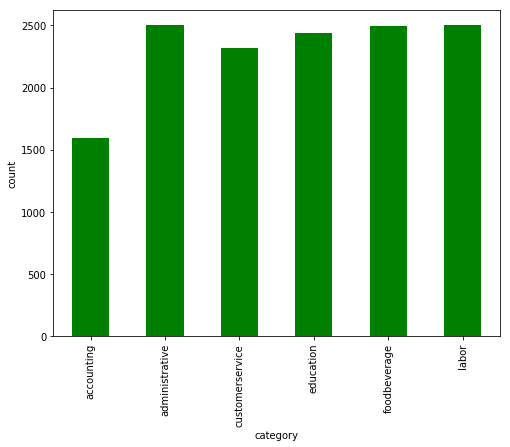

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').jobtitle.count().plot.bar(ylim=0,color='g')
plt.ylabel('count')
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
len(df)

13845

In [8]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
features = tfidf.fit_transform(df.jobtitle).toarray()
labels = df.category_id
features.shape

(13845, 3212)

In [12]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:

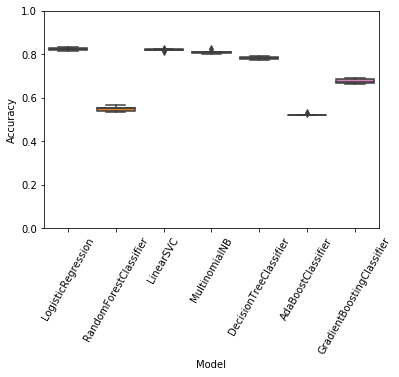

In [49]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=11),
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=20),
    GradientBoostingClassifier(n_estimators=20)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
g = sns.boxplot(x='model_name', y='accuracy', data=cv_df)

g.set_xticklabels(g.get_xticklabels(),rotation=60)
#sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=5, linewidth=1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [50]:
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier            0.522643
DecisionTreeClassifier        0.782883
GradientBoostingClassifier    0.677645
LinearSVC                     0.822031
LogisticRegression            0.824415
MultinomialNB                 0.811991
RandomForestClassifier        0.551028
Name: accuracy, dtype: float64

(0, 1)

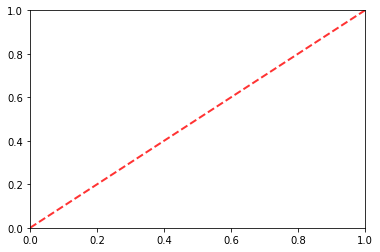

In [23]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
plt.plot(cv_df['fold_idx'] , cv_df['accuracy'])

In [81]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


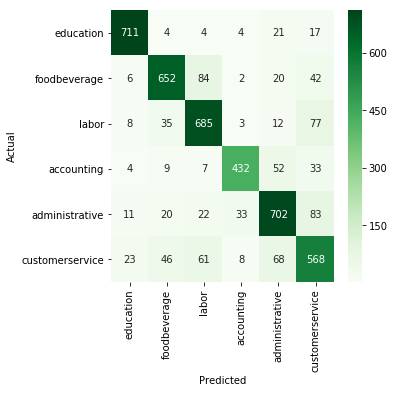

In [82]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, cmap="Greens", annot=True, fmt='d', xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#ax.set_ylim()
plt.show()

array([[711,   4,   4,   4,  21,  17],
       [  6, 652,  84,   2,  20,  42],
       [  8,  35, 685,   3,  12,  77],
       [  4,   9,   7, 432,  52,  33],
       [ 11,  20,  22,  33, 702,  83],
       [ 23,  46,  61,   8,  68, 568]], dtype=int64)

In [44]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

In [46]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

labels

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
13815    5
13816    5
13817    5
13818    5
13819    5
13820    5
13821    5
13822    5
13823    5
13824    5
13825    5
13826    5
13827    5
13828    5
13829    5
13830    5
13831    5
13832    5
13833    5
13834    5
13835    5
13836    5
13837    5
13838    5
13839    5
13840    5
13841    5
13842    5
13843    5
13844    5
Name: category_id, Length: 13845, dtype: int64

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [61]:
import xgboost as xgb

In [65]:
X_train, X_test, Y_train, Y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

In [67]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [76]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 6} 

steps = 500  # The number of training iterations

In [77]:
model = xgb.train(param, D_train, steps)

In [78]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.8178374981626977
Recall = 0.8109642765523942
Accuracy = 0.8093674764718757


In [83]:
model.fit(features, labels)
N = 2


for category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agyumol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 'accounting':
  . Top unigrams:
       . accountant
       . accounting
  . Top bigrams:
       . accounts payable
       . success manager
# 'administrative':
  . Top unigrams:
       . office
       . admin
  . Top bigrams:
       . executive assistant
       . personal assistant
# 'customerservice':
  . Top unigrams:
       . customer
       . sales
  . Top bigrams:
       . service advisor
       . teller time
# 'education':
  . Top unigrams:
       . teacher
       . teachers
  . Top bigrams:
       . tutors needed
       . hiring time
# 'foodbeverage':
  . Top unigrams:
       . cook
       . restaurant
  . Top bigrams:
       . assistant manager
       . team members
# 'labor':
  . Top unigrams:
       . maintenance
       . warehouse
  . Top bigrams:
       . 595 week
       . make 595
